In [266]:
import pandas as pd
import numpy as np

In [267]:
Datosagr=["Mi proyecto\Data\Broad.csv","Mi proyecto\Data\Frase.csv","Mi proyecto\Data\Kindle.csv","Mi proyecto\Data\Phase.csv"]


In [268]:
Muestra=[]
for archivos in Datosagr:
 df=pd.read_csv(archivos, sep=";")
 Muestra.append(df)



In [269]:
#test

In [270]:
datos_raw = pd.concat(Muestra, ignore_index=True)
datos_raw

,Estado,CAMPAIGN,Palabra clave,Tipo de coincidencia,Estado.1,Puja recomendada (bajo)(EUR),Puja recomendada (mediana)(EUR),Puja recomendada (alto)(EUR),Puja por palabra clave(EUR),PI del top de búsquedas,Impresiones,Clics,Tasa de clics (CTR),Inversión(EUR),Costo por clic (CPC)(EUR),Pedidos,Ventas(EUR),ACOS,KENP leídas,Estimación de regalías de KENP(EUR)
0,PAUSED,BROAD,victoria alvarez,BROAD,TARGETING_CLAUSE_PAUSED,0.15,0.18,0.31,0.10,NaN,98,0,0.0000,0.00,0.00,0,0.0,NaN,0,0.00
1,PAUSED,BROAD,trono de cristal saga,BROAD,TARGETING_CLAUSE_PAUSED,0.12,0.14,0.15,0.10,50.0%,1766,1,0.0006,0.09,0.09,0,0.0,NaN,0,0.00
2,PAUSED,BROAD,trono de cristal,BROAD,TARGETING_CLAUSE_PAUSED,0.13,0.14,0.20,0.10,NaN,7,0,0.0000,0.00,0.00,0,0.0,NaN,0,0.00
3,PAUSED,BROAD,top libros juveniles,BROAD,TARGETING_CLAUSE_PAUSED,0.14,0.14,0.16,0.10,NaN,5,0,0.0000,0.00,0.00,0,0.0,NaN,0,0.00
4,PAUSED,BROAD,tolkien aniversario,EXACT,TARGETING_CLAUSE_PAUSED,NaN,NaN,NaN,0.10,NaN,0,0,NaN,0.00,0.00,0,0.0,NaN,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425,ENABLED,PHASE,archivo de tormentas,PHRASE,CAMPAIGN_PAUSED,0.13,0.16,0.22,0.10,891891891891892%,1713,2,0.0012,0.96,0.48,0,0.0,NaN,646,2.66
3426,ENABLED,PHASE,amazon libros,PHRASE,CAMPAIGN_PAUSED,0.14,0.16,0.26,0.10,6153846153846150%,449,0,0.0000,0.00,0.00,0,0.0,NaN,0,0.00
3427,ENABLED,PHASE,14 años libros,PHRASE,CAMPAIGN_PAUSED,NaN,NaN,NaN,0.10,53333333333333300%,256,0,0.0000,0.00,0.00,0,0.0,NaN,0,0.00
3428,ENABLED,PHASE,12 años,PHRASE,CAMPAIGN_PAUSED,0.17,0.21,0.33,0.08,3514328808446450%,990,5,0.0051,3.92,0.78,0,0.0,NaN,0,0.00


In [271]:
#eliminar columnas  estado  estado.1, pujas recomendadas, pl, acos, estimacion regalias [todas las sobrantes]

datos_raw = datos_raw.drop(labels=["Estado", "Estado.1","Puja recomendada (bajo)(EUR)", "Puja recomendada (mediana)(EUR)","Puja recomendada (alto)(EUR)","PI del top de búsquedas", "Puja por palabra clave(EUR)", "Tasa de clics (CTR)", "ACOS", "KENP leídas","Estimación de regalías de KENP(EUR)","Ventas(EUR)"], axis=1)
datos_raw

,CAMPAIGN,Palabra clave,Tipo de coincidencia,Impresiones,Clics,Inversión(EUR),Costo por clic (CPC)(EUR),Pedidos
0,BROAD,victoria alvarez,BROAD,98,0,0.00,0.00,0
1,BROAD,trono de cristal saga,BROAD,1766,1,0.09,0.09,0
2,BROAD,trono de cristal,BROAD,7,0,0.00,0.00,0
3,BROAD,top libros juveniles,BROAD,5,0,0.00,0.00,0
4,BROAD,tolkien aniversario,EXACT,0,0,0.00,0.00,0
...,...,...,...,...,...,...,...,...
3425,PHASE,archivo de tormentas,PHRASE,1713,2,0.96,0.48,0
3426,PHASE,amazon libros,PHRASE,449,0,0.00,0.00,0
3427,PHASE,14 años libros,PHRASE,256,0,0.00,0.00,0
3428,PHASE,12 años,PHRASE,990,5,3.92,0.78,0


In [272]:
#simplificamos nombres de columnas complicadas

datos_raw= datos_raw.rename(columns={"Tipo de coincidencia": "concordancia", "Inversión(EUR)": "gasto", "Costo por clic (CPC)(EUR)": "CPC"})
datos_raw


,CAMPAIGN,Palabra clave,concordancia,Impresiones,Clics,gasto,CPC,Pedidos
0,BROAD,victoria alvarez,BROAD,98,0,0.00,0.00,0
1,BROAD,trono de cristal saga,BROAD,1766,1,0.09,0.09,0
2,BROAD,trono de cristal,BROAD,7,0,0.00,0.00,0
3,BROAD,top libros juveniles,BROAD,5,0,0.00,0.00,0
4,BROAD,tolkien aniversario,EXACT,0,0,0.00,0.00,0
...,...,...,...,...,...,...,...,...
3425,PHASE,archivo de tormentas,PHRASE,1713,2,0.96,0.48,0
3426,PHASE,amazon libros,PHRASE,449,0,0.00,0.00,0
3427,PHASE,14 años libros,PHRASE,256,0,0.00,0.00,0
3428,PHASE,12 años,PHRASE,990,5,3.92,0.78,0


In [273]:
#rentabilidad
datos_raw["clicks para vta"] = round(datos_raw["Clics"]/datos_raw["Pedidos"], 1)




In [274]:
datos_raw["coste venta"]=round(datos_raw["gasto"]/datos_raw["Pedidos"],1)
datos_raw


,CAMPAIGN,Palabra clave,concordancia,Impresiones,Clics,gasto,CPC,Pedidos,clicks para vta,coste venta
0,BROAD,victoria alvarez,BROAD,98,0,0.00,0.00,0,NaN,NaN
1,BROAD,trono de cristal saga,BROAD,1766,1,0.09,0.09,0,inf,inf
2,BROAD,trono de cristal,BROAD,7,0,0.00,0.00,0,NaN,NaN
3,BROAD,top libros juveniles,BROAD,5,0,0.00,0.00,0,NaN,NaN
4,BROAD,tolkien aniversario,EXACT,0,0,0.00,0.00,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3425,PHASE,archivo de tormentas,PHRASE,1713,2,0.96,0.48,0,inf,inf
3426,PHASE,amazon libros,PHRASE,449,0,0.00,0.00,0,NaN,NaN
3427,PHASE,14 años libros,PHRASE,256,0,0.00,0.00,0,NaN,NaN
3428,PHASE,12 años,PHRASE,990,5,3.92,0.78,0,inf,inf


In [275]:
datos_con_ventas = datos_raw[datos_raw["Pedidos"] > 0]
datos_con_ventas

,CAMPAIGN,Palabra clave,concordancia,Impresiones,Clics,gasto,CPC,Pedidos,clicks para vta,coste venta
85,BROAD,novelas juveniles 12 años,BROAD,161,4,2.44,0.61,1,4.0,2.4
94,BROAD,novelas de fantasia,BROAD,137,6,3.62,0.60,1,6.0,3.6
166,BROAD,literatura juvenil 16 años,BROAD,428,15,7.42,0.49,1,15.0,7.4
168,BROAD,literatura juvenil 12 años,BROAD,857,16,6.79,0.42,1,16.0,6.8
169,BROAD,literatura juvenil,BROAD,9223,57,31.80,0.56,3,19.0,10.6
...,...,...,...,...,...,...,...,...,...,...
3377,PHASE,laura gallego,EXACT,16433,47,20.58,0.44,1,47.0,20.6
3379,PHASE,las puertas de piedra,PHRASE,6105,9,1.03,0.11,2,4.5,0.5
3390,PHASE,juvenil,PHRASE,6724,43,31.91,0.74,3,14.3,10.6
3398,PHASE,harry potter libro,EXACT,8682,6,1.36,0.23,1,6.0,1.4


In [276]:
#HIPOTESIS 1 CONCORDANCIAS

datos_concordancia = datos_con_ventas.groupby("concordancia").agg({"Pedidos": "sum", "CPC": "mean", "clicks para vta":"mean", "coste venta":"mean", "Impresiones":"sum","Clics":"sum"})
datos_concordancia = datos_concordancia.round(1)
datos_concordancia

,Pedidos,CPC,clicks para vta,coste venta,Impresiones,Clics
concordancia,,,,,,
BROAD,127,0.6,9.4,5.7,101102,1246
EXACT,65,0.5,20.1,9.8,366093,1368
PHRASE,116,0.5,14.8,7.0,548476,1833


In [277]:
#datos ventas



In [278]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='concordancia', ylabel='Pedidos'>

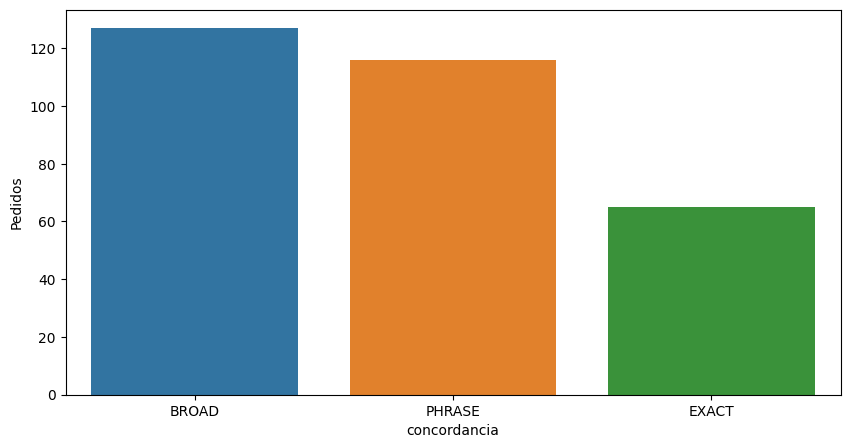

In [279]:
#¿Qué resultados ofrece cada tipo?

plt.figure(figsize=(10,5))
sns.barplot(x="concordancia", y="Pedidos", data=datos_con_ventas, estimator=sum,  errorbar=None)



<AxesSubplot:xlabel='Clics', ylabel='Pedidos'>

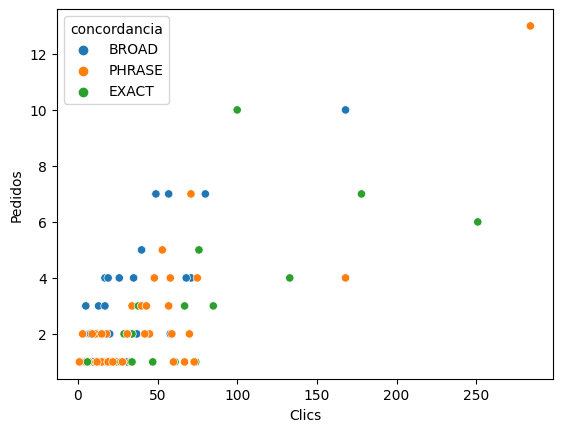

In [280]:
#Relación de Clicks e Impresiones según concordancia


sns.scatterplot(x="Clics", y="Pedidos", hue="concordancia", data=datos_con_ventas)


In [281]:
#RENTABILIDAD SEGÚN CONCORDANCIA

datos_vtas_amplia = datos_con_ventas.loc[datos_con_ventas["concordancia"] == "BROAD"]
datos_vtas_frase = datos_con_ventas.loc[datos_con_ventas["concordancia"] == "PHRASE"]
datos_vtas_exacta= datos_con_ventas.loc[datos_con_ventas["concordancia"] == "EXACT"]

Text(0, 0.5, 'gasto')

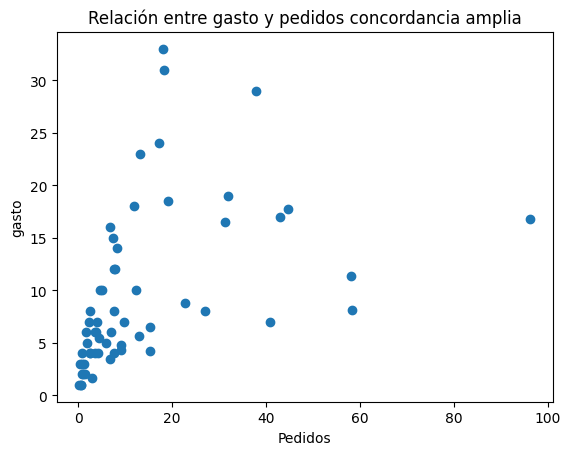

In [282]:
#RENTABILIDAD SEGÚN CONCORDANCIA 


plt.scatter(datos_vtas_amplia["gasto"], datos_vtas_amplia["clicks para vta"])

# Agregar título y etiquetas de los ejes
plt.title("Relación entre gasto y pedidos concordancia amplia")
plt.xlabel("Pedidos")
plt.ylabel("gasto")


Text(0, 0.5, 'gasto')

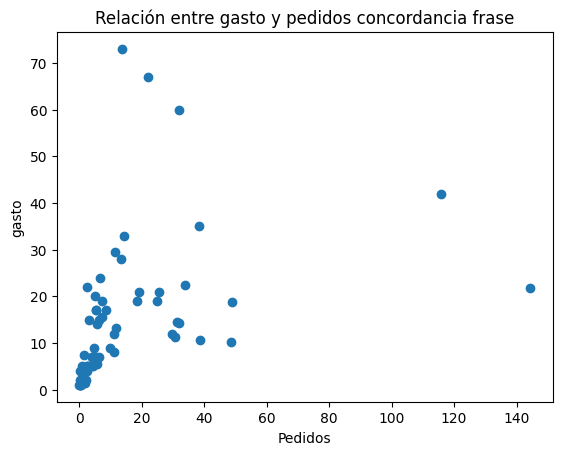

In [283]:
#RENTABILIDAD SEGÚN CONCORDANCIA FRASE


plt.scatter(datos_vtas_frase["gasto"], datos_vtas_frase["clicks para vta"])

# Agregar título y etiquetas de los ejes
plt.title("Relación entre gasto y pedidos concordancia frase")
plt.xlabel("Pedidos")
plt.ylabel("gasto")

Text(0, 0.5, 'gasto')

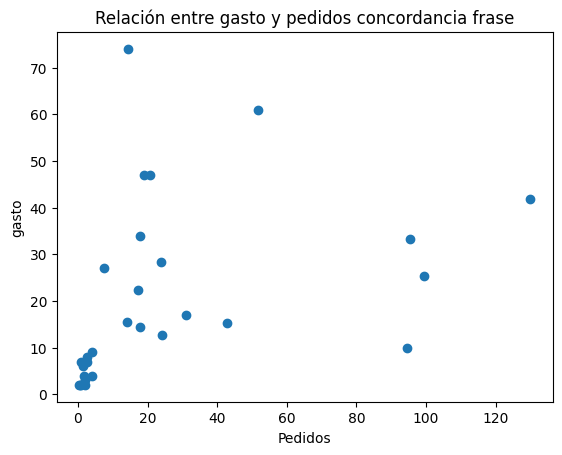

In [284]:
#RENTABILIDAD SEGÚN CONCORDANCIA EXACTA


plt.scatter(datos_vtas_exacta["gasto"], datos_vtas_exacta["clicks para vta"])

# Agregar título y etiquetas de los ejes
plt.title("Relación entre gasto y pedidos concordancia frase")
plt.xlabel("Pedidos")
plt.ylabel("gasto")

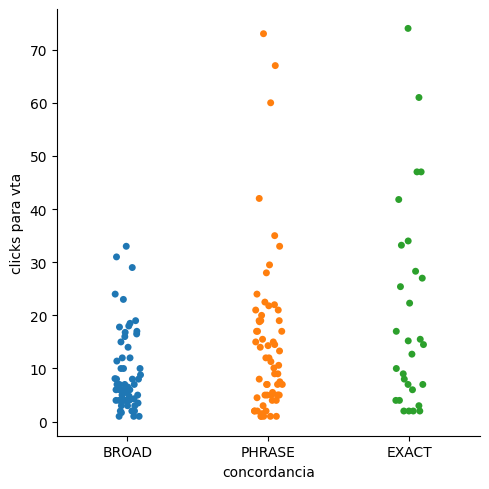

In [285]:
#clics para obtener una venta según concordancia
sns.catplot(x="concordancia", y="clicks para vta", hue="concordancia", data=datos_con_ventas);

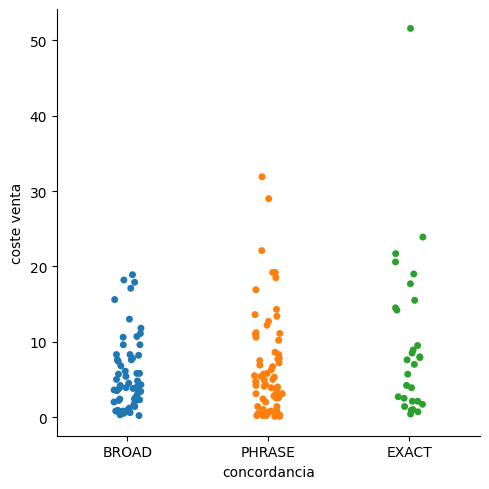

In [286]:
sns.catplot(x="concordancia", y="coste venta", hue="concordancia", data=datos_con_ventas);

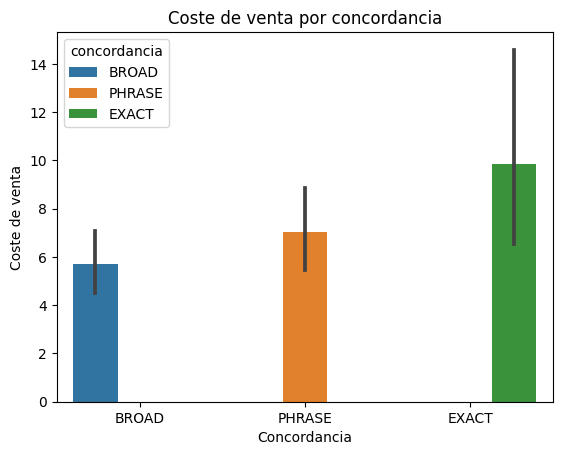

In [287]:


sns.barplot(x="concordancia", y="coste venta", hue="concordancia", data=datos_con_ventas)

plt.title("Coste de venta por concordancia")
plt.xlabel("Concordancia")
plt.ylabel("Coste de venta")

plt.show()


In [288]:
#PALABRAS CLAVE

In [298]:
#kw mas ineficientes

datos_sin_ventas = datos_raw[datos_raw["Pedidos"] == 0]
datos_ordenados = datos_sin_ventas.sort_values(by="gasto", ascending=False)
datos_ordenados

,CAMPAIGN,Palabra clave,concordancia,Impresiones,Clics,gasto,CPC,Pedidos,clicks para vta,coste venta
484,BROAD,libros fantasia,EXACT,4423,32,34.61,1.08,0,inf,inf
529,BROAD,libros de fantasía,BROAD,4071,33,29.08,0.88,0,inf,inf
717,BROAD,libros 14 años,BROAD,999,35,22.05,0.63,0,inf,inf
855,BROAD,libro 18 años,BROAD,2083,38,20.82,0.55,0,inf,inf
2419,Kindle,libros para kindle,BROAD,15613,61,20.43,0.33,0,inf,inf
...,...,...,...,...,...,...,...,...,...,...
1303,FRASE,libros brandon sanderson,PHRASE,0,0,0.00,0.00,0,NaN,NaN
1304,FRASE,libros baratos 12 años,PHRASE,0,0,0.00,0.00,0,NaN,NaN
1305,FRASE,libros aventuras niños 12 años,PHRASE,0,0,0.00,0.00,0,NaN,NaN
1306,FRASE,libros aventuras niños 10 años,PHRASE,0,0,0.00,0.00,0,NaN,NaN


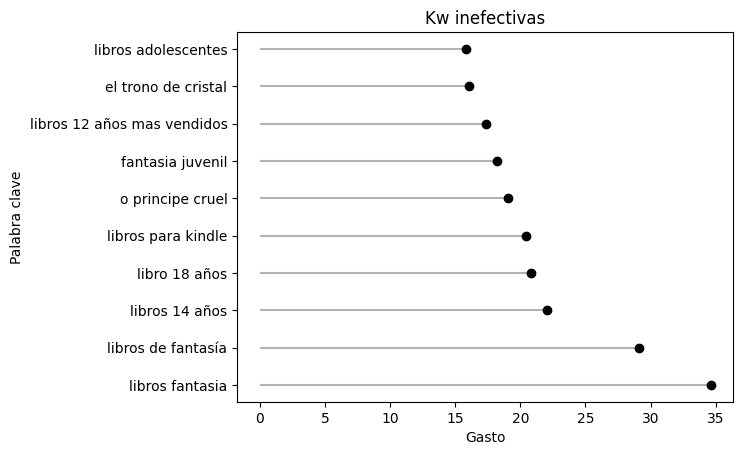

In [304]:
import matplotlib.pyplot as plt

datos_ordenados = datos_sin_ventas.sort_values(by="gasto", ascending=False)

datos_top10 = datos_ordenados.head(10)

# Crear un gráfico de barras horizontal con puntos circulares
plt.hlines(y=datos_top10["Palabra clave"], xmin=0, xmax=datos_top10["gasto"], color='gray', alpha=0.6)
plt.plot(datos_top10["gasto"], datos_top10["Palabra clave"], "o", color='black')

# Agregar título y etiquetas de los ejes
plt.title("Kw inefectivas")
plt.xlabel("Gasto")
plt.ylabel("Palabra clave")

# Mostrar el gráfico
plt.show()

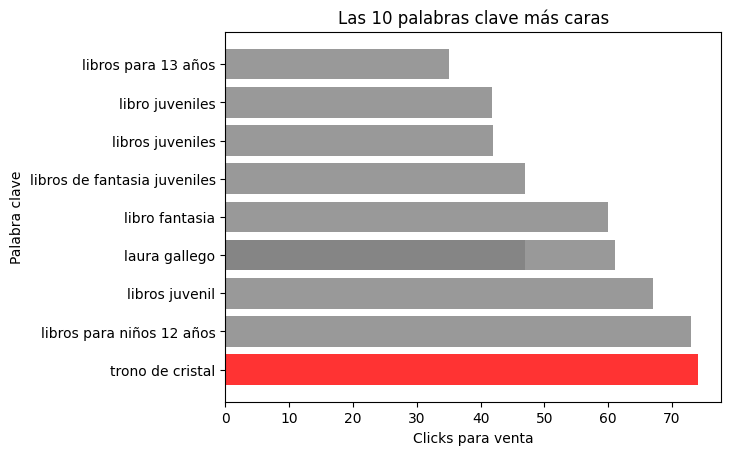

In [312]:
#kw cuyo gasto para conseguir una venta sea demasiado elevado   

datos_ordenados = datos_con_ventas.sort_values(by="clicks para vta", ascending=False)

datos_top10 = datos_ordenados.head(10)

plt.barh(datos_top10["Palabra clave"], datos_top10["clicks para vta"], color=colores, alpha=0.8)


plt.title("Las 10 palabras clave más caras")
plt.xlabel("Clicks para venta")
plt.ylabel("Palabra clave")


plt.show()



In [328]:
#kw cuyo gasto para conseguir una venta sea demasiado elevado  

datos_raw["ratio impresion click"]=round(datos_raw["Clics"]/datos_raw["Impresiones"],2)*100





,CAMPAIGN,Palabra clave,concordancia,Impresiones,Clics,gasto,CPC,Pedidos,clicks para vta,coste venta,ratio impresion click
0,BROAD,victoria alvarez,BROAD,98,0,0.00,0.00,0,NaN,NaN,0.0
1,BROAD,trono de cristal saga,BROAD,1766,1,0.09,0.09,0,inf,inf,0.0
2,BROAD,trono de cristal,BROAD,7,0,0.00,0.00,0,NaN,NaN,0.0
3,BROAD,top libros juveniles,BROAD,5,0,0.00,0.00,0,NaN,NaN,0.0
4,BROAD,tolkien aniversario,EXACT,0,0,0.00,0.00,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3425,PHASE,archivo de tormentas,PHRASE,1713,2,0.96,0.48,0,inf,inf,0.0
3426,PHASE,amazon libros,PHRASE,449,0,0.00,0.00,0,NaN,NaN,0.0
3427,PHASE,14 años libros,PHRASE,256,0,0.00,0.00,0,NaN,NaN,0.0
3428,PHASE,12 años,PHRASE,990,5,3.92,0.78,0,inf,inf,1.0


In [337]:

con_impresiones=(datos_raw["Impresiones"]>100)
#con_impresiones_low= con_impresiones.sort_values(by="ratio impresion click", ascending=False)
#dato



#datos_ordenados = datos_con_ventas.sort_values(by="clicks para vta", ascending=False)




In [338]:
ordenado_impresiones=datos_raw.loc[con_impresiones].sort_values(by="Impresiones", ascending=False)
ordenado_impresiones

,CAMPAIGN,Palabra clave,concordancia,Impresiones,Clics,gasto,CPC,Pedidos,clicks para vta,coste venta,ratio impresion click
23,BROAD,o principe cruel,BROAD,111703,105,19.05,0.18,0,inf,inf,0.0
2566,PHASE,trono de cristal,EXACT,91182,74,14.50,0.20,1,74.0,14.5,0.0
3408,PHASE,el trono de cristal,PHRASE,85111,83,16.04,0.19,0,inf,inf,0.0
1507,FRASE,el trono de cristal,PHRASE,81935,59,11.53,0.20,2,29.5,5.8,0.0
1195,FRASE,libros juvenil,PHRASE,64034,67,22.07,0.33,1,67.0,22.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2648,PHASE,novelas juveniles 12 años,PHRASE,102,1,1.18,1.18,0,inf,inf,1.0
2361,Kindle,libros para 13 años de chicas,BROAD,102,0,0.00,0.00,0,NaN,NaN,0.0
1684,Kindle,libros juvenil 12 años,PHRASE,101,5,2.51,0.50,1,5.0,2.5,5.0
2633,PHASE,novelas medievales,PHRASE,101,0,0.00,0.00,0,NaN,NaN,0.0


In [342]:
#ventas con mayor coste 


ventas_coste_alto= datos_con_ventas.sort_values(by="coste venta", ascending=False)
ventas_coste_alto.head(10)

,CAMPAIGN,Palabra clave,concordancia,Impresiones,Clics,gasto,CPC,Pedidos,clicks para vta,coste venta
885,BROAD,laura gallego,EXACT,8429,61,51.62,0.85,1,61.0,51.6
3296,PHASE,libro fantasia,PHRASE,1890,60,31.93,0.53,1,60.0,31.9
2981,PHASE,libros juveniles,PHRASE,56084,168,115.86,0.69,4,42.0,29.0
569,BROAD,libros de adolescentes,EXACT,9369,133,95.43,0.72,4,33.2,23.9
1195,FRASE,libros juvenil,PHRASE,64034,67,22.07,0.33,1,67.0,22.1
774,BROAD,libro juveniles,EXACT,40044,251,129.97,0.52,6,41.8,21.7
3377,PHASE,laura gallego,EXACT,16433,47,20.58,0.44,1,47.0,20.6
837,BROAD,libro adolescentes,PHRASE,3024,21,19.19,0.91,1,21.0,19.2
288,BROAD,libros para 13 años,PHRASE,2458,70,38.44,0.55,2,35.0,19.2
537,BROAD,libros de fantasia juveniles,EXACT,3256,47,18.96,0.40,1,47.0,19.0


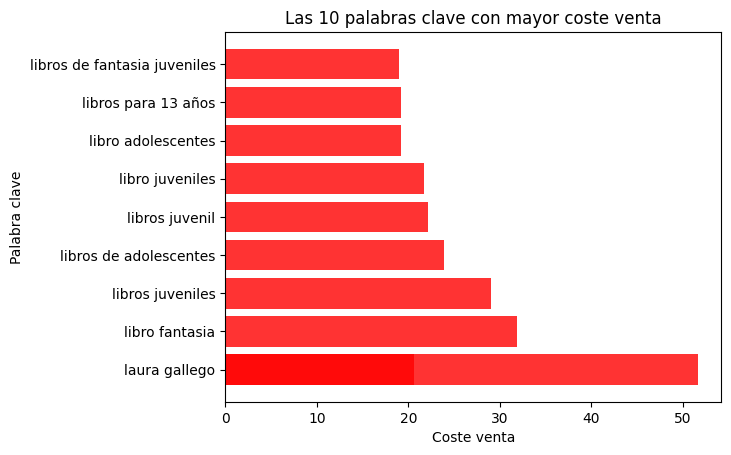

In [343]:
import matplotlib.pyplot as plt

# Ordenar los datos por la columna "coste venta"
ventas_coste_alto = datos_con_ventas.sort_values(by="coste venta", ascending=False)

# Seleccionar las primeras 10 filas
ventas_coste_alto_top10 = ventas_coste_alto.head(10)

# Crear un gráfico de barras horizontales
plt.barh(ventas_coste_alto_top10["Palabra clave"], ventas_coste_alto_top10["coste venta"], color="red", alpha=0.8)

# Agregar título y etiquetas de los ejes
plt.title("Las 10 palabras clave con mayor coste venta")
plt.xlabel("Coste venta")
plt.ylabel("Palabra clave")

# Mostrar el gráfico
plt.show()


In [352]:
#mayor cpc

rdos=datos_con_ventas.sort_values(by="Pedidos", ascending=False)
rdos.head(5)

,CAMPAIGN,Palabra clave,concordancia,Impresiones,Clics,gasto,CPC,Pedidos,clicks para vta,coste venta
436,BROAD,libros juvenil,PHRASE,52771,284,144.41,0.51,13,21.8,11.1
838,BROAD,libro adolescentes,EXACT,7321,100,94.67,0.95,10,10.0,9.5
274,BROAD,libros para adolescentes,BROAD,18477,168,96.23,0.57,10,16.8,9.6
1319,FRASE,libros adolescentes,PHRASE,23846,71,48.60,0.68,7,10.1,6.9
647,BROAD,libros adolescentes 14 años,BROAD,3930,80,58.02,0.73,7,11.4,8.3
